# Graphs using networkx
Our week 4 lesson workbook, available on Github from the powderflask/cap-comp215 repository.

As usual, the first code block just imports the modules we will use.

In [13]:
%matplotlib inline

import random
from timeit import timeit
from typing import Sequence

import matplotlib.pyplot as plt
import networkx as nx

## Directed graph

The first example is a directed graph that represents a social network with four nodes.

In [14]:
social_network = nx.DiGraph()
social_network.add_node('John')
social_network.add_node('Alice')
social_network.add_node('Bob')
social_network.add_node('Chuck')
list(social_network.nodes())

['John', 'Alice', 'Bob', 'Chuck']

Add some edges between nodes to represent the "Follows" relationship (e.g., Alice "follows" Bob)

In [15]:
social_network.add_edge('Alice', 'Bob')
social_network.add_edge('Alice', 'Chuck')
social_network.add_edge('Bob', 'Alice')
social_network.add_edge('Bob', 'Chuck')
social_network.add_edge('John','Bob')
social_network.add_edge('John','Alice')
list(social_network.edges())

[('John', 'Bob'),
 ('John', 'Alice'),
 ('Alice', 'Bob'),
 ('Alice', 'Chuck'),
 ('Bob', 'Alice'),
 ('Bob', 'Chuck')]

And here's how to draw the graph.
Modify the draw parameters to see how to customize the display [[docs](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html)]

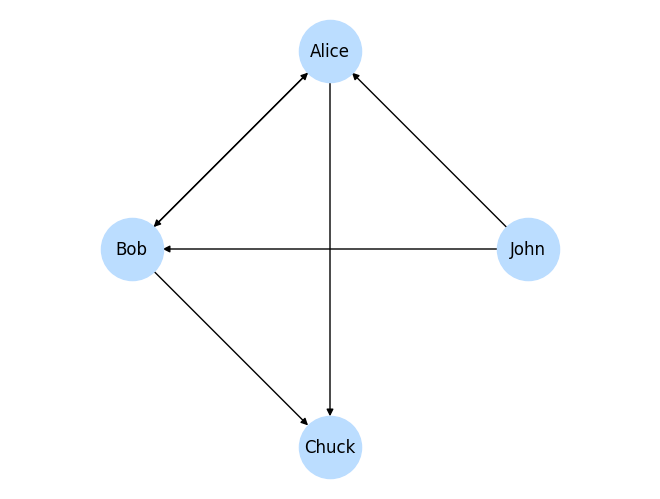

In [16]:
nx.draw_circular(social_network,
                 node_color='#bbddff',
                 node_size=2000,
                 with_labels=True)
plt.axis('equal')
plt.show()

### Exercise 1: build your own social network
Create a small social network graph of your own that shows how a group of people are inter-related.
Don't modify the code above, instead, create and draw a new graph below.

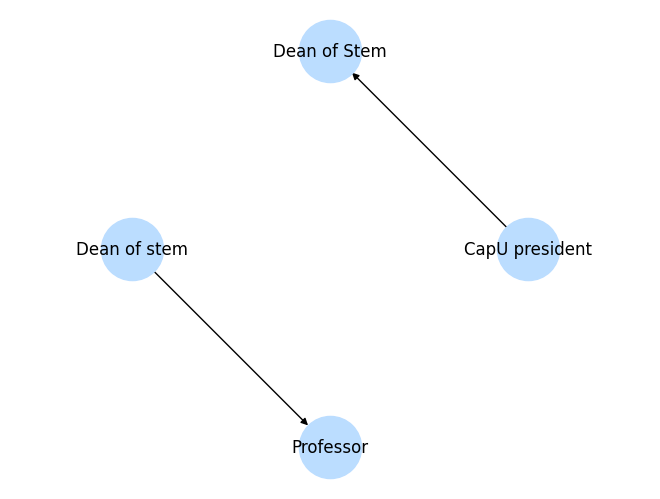

In [17]:
# Ex. 1 your code here
a_social_network = nx.DiGraph()
a_social_network.add_edge('CapU president','Dean of Stem')
a_social_network.add_edge('Dean of stem','Professor')
list(a_social_network.edges())
nx.draw_circular(a_social_network,
                 node_color='#bbddff',
                 node_size=2000,
                 with_labels=True)
plt.axis('equal')
plt.show()

## Undirected graph

The second example is an undirected graph that represents cities and the driving times between them.

`locations` is a dictionary that maps from each city to a spatial coordinate and
`drive_times` is a dictionary that maps a pair of cities to the driving time in minutes between them.

In [18]:
locations = dict(NorthVan=(5, 5),
                 Burnaby=(7, 1),
                 Vancouver=(0, 0),  # position Vancouver at the centre of the universe, of course ;-)
                 Richmond=(-1, -4))

drive_times = {('NorthVan', 'Burnaby'): 20,
               ('NorthVan', 'Vancouver'): 35,
               ('Burnaby', 'Vancouver'): 15,
               ('Vancouver', 'Richmond'): 25}

f"From North Van at {locations['NorthVan']} the drive time to Burnaby is {drive_times[('NorthVan', 'Burnaby')]} minutes."

'From North Van at (5, 5) the drive time to Burnaby is 20 minutes.'

Now we can use the keys in `locations` to add nodes to a graph,
and the `drive_times` keys to define the edges between them
Notice how when a `dict` object is treated as a sequence (rather than a mapping), it is a sequence of it's **keys**.

In [19]:
cities = nx.Graph()
cities.add_nodes_from(locations)
cities.add_edges_from(drive_times)

cities.nodes(), cities.edges()

(NodeView(('NorthVan', 'Burnaby', 'Vancouver', 'Richmond')),
 EdgeView([('NorthVan', 'Burnaby'), ('NorthVan', 'Vancouver'), ('Burnaby', 'Vancouver'), ('Vancouver', 'Richmond')]))

And we can draw the graph using `locations` to arrange nodes spatially and with `drive_times` to label the edges.

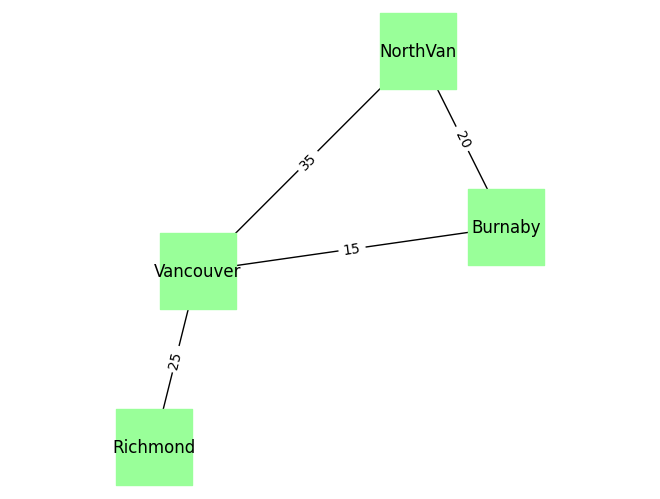

In [20]:
nx.draw(cities, locations,
        node_color='#99ff99',
        node_shape='s',
        node_size=3000,
        with_labels=True)

nx.draw_networkx_edge_labels(cities, locations,
                             edge_labels=drive_times)

plt.axis('equal')
plt.show()

### Exercise 2: add some cities
Add at least 2 additional nodes (cities) and edges (drive times) and re-draw the graph.
Improve the data in your version of the graph by looking up estimated / average drive times.
Don't modify the code above - re-develop a complete solution with your additions / changes in the code block below.

In [21]:
# Solution to Ex. 2 goes here...

## Complete graph

In a [complete graph](https://en.wikipedia.org/wiki/Complete_graph), every distinct pair of nodes is connected by an edge.
We'll decompose this problem into a simpler one.

### Exercise 3: all pairs algorithm
Write a function, `all_pairs(objects:list)`, that returns a generator that returns the 2-tuples representing the complete set of distinct, undirected object pairs.

In [22]:
def all_pairs(objects):
    """ Return the complete set of distinct object pairs, as 2-tuples, from the given sequence of objects """


# unit test
assert set( all_pairs(('x', 'y', 'z')) ) == {('x', 'y'), ('x', 'z'), ('y', 'z')}

TypeError: 'NoneType' object is not iterable

`make_complete_graph` makes a `Graph` with the given number of nodes and edges between each distinct pair of nodes.

In [ ]:
def make_complete_graph(n):
    """ Return a "complete" undirected Graph with n nodes labeled 0 .. n-1 """
    graph = nx.Graph()
    labels = range(n)
    graph.add_nodes_from(labels)
    graph.add_edges_from(all_pairs(labels))
    return graph

In [ ]:
complete = make_complete_graph(10)
f'Complete Graph has {complete.number_of_nodes()} nodes and {complete.number_of_edges()} edges'

In [ ]:
nx.draw_circular(complete,
                 node_color='#ffaa99',
                 node_size=1000,
                 with_labels=True)
plt.gca().set(
    title=f'Complete Graph has {complete.number_of_nodes()} nodes and {complete.number_of_edges()} edges'
)
plt.show()

The `neighbors` method of a Graph object returns the nodes with an edge a given node.  In a complete graph, that is all other nodes!

In [ ]:
node = 3
f'Neighbours of node {node}:  {list(complete.neighbors(0))}'

### Exercise 4: make a complete graph
Create and draw another complete graph with a different number of nodes below.
Write an `assert` statement that verifies each node has the expected number of `neighbors`

In [ ]:
# Solution for Ex. 4 here...

## Random graphs
from the textbook...
> One of the more interesting [random graphs](https://en.wikipedia.org/wiki/Random_graph) is the Erdős-Rényi model, studied by Paul Erdős and Alfréd Rényi in the 1960s.

> An Erdős-Rényi graph (ER graph) is characterized by two parameters: $n$ is the number of nodes and $p$ is the probability that there is an edge between any two nodes.

> Erdős and Rényi studied the properties of these random graphs; one of their surprising results is the existence of abrupt changes in the properties of random graphs as random edges are added.

In this week's lab you will be re-producing this computational experiment.
To prepare, we will work on the experimental setup.  First step is to develop the code to generate a "random graph"...

## Random Numbers
This is a big topic we will dig deeper into this week.  A short introduction for now...

We `seed` Python's built-in random number generator so we get the same sequence each time (to facilitate debugging and comprehension!)  Comment this out to create an actual "random" graph...

In [ ]:
random.seed(6) # Comment this out to run randomized experiments

### Exercise 5: simple coin toss
We want a boolean function that returns True or False at random.

In other words, repeated calls to the function below will generate a random sequence of True/False values.
It's easiest to think of this as a simulated "coin toss", where True is "heads" and False is "tails".

In [ ]:
def coin_toss(p=0.5):
    """ Simulate flipping a biased "coin", where the probability of 'heads' is p.  Return True iff 'heads', False otherwise """
    # Solution for Ex. 5 here


### Exercise 6: list of coin tosses
Define a list comprehension that generated a random sequence of 100 "fair" `coin_toss`es  ($p = 0.5$)
Count the number "heads" (True) and "tails" (False) in the list (hint:  `sum(1 for toss in .... if ....)
Rerun the experiment several times to gain a deeper understanding of what this function does.
Experiment with different values of $p$.  What is the meaning of $p$ in this context?

In [ ]:
# Solution for Ex. 6 here...

### Exercise 7: random pairs algorithm
We need an algorithm that **filters** the list of `all_pairs` to select some of them at random, with some probability, $p$.

Write a function `random_pairs` that returns a generator with a random subset of all possible distinct pairs from a set of objects, where each pair has a fixed probability, `p` of appearing in the subset.

Notice the algorithm will start with `all_pairs` and apply a **filter** operation to randomly filter some pairs out with probability $p$.

In [ ]:
def random_pairs(objects, p=0.5):
    """ Return a generator of random subset of distinct object pairs (2-tuples), each with a probability of `p` """
    # Solution to Ex. 7 here...


# Run some experiments explore how this function works with different value of `p`.
# What is the general result for larger or smaller values of `p`?
list( random_pairs(('w', 'x', 'y', 'z'), p=0.5))

### Finally, a Random Graph!

The `make_random_graph` function below makes an ER (Erdős-Rényi) Graph where the probability of an edge between each pair of nodes is $p$.

Run a few experiments to get familiar with how this function works and the kinds of graphs it produces for different values of `p`.

In [ ]:
def make_random_graph(n, p):
    """ Return an ER Graph with n nodes, where the probability of an edge between a pair of nodes in p """
    graph = nx.Graph()
    labels = range(n)
    graph.add_nodes_from(labels)
    graph.add_edges_from(random_pairs(labels, p))
    return graph

In [ ]:
random_graph = make_random_graph(10, 0.3)
print(f'Random Graph has {random_graph.number_of_nodes()} nodes and {random_graph.number_of_edges()} edges')

nx.draw_circular(random_graph,
                 node_color='#ff99dd',
                 node_size=1000,
                 with_labels=True)
plt.gca().set(
    title=f'Random Graph has {random_graph.number_of_nodes()} nodes and {random_graph.number_of_edges()} edges'
)
plt.show()

## Connectivity

"A graph is said to be connected if ... there is some path between every pair of vertices." [wikipedia](https://en.wikipedia.org/wiki/Connectivity_(graph_theory))

To check whether a graph is "connected", we'll start by finding all nodes that can be reached, starting at a given node.
This algorithm uses a `set` to keep track of nodes we've already `seen` and a `stack` (list) to keep track of nodes we could reach from here.

In [ ]:
def reachable_nodes(graph, start):
    """ return the set of nodes that are reachable from the given start node"""

    # We will develop this algorithm together in class


In the complete graph, we can reach all nodes from any starting node, but that's not necessarily true for a random graph...

In [ ]:
reachable_nodes(complete, 1)

In [ ]:
reachable_nodes(random_graph, 1)

Now it's straight-forward to determine if the graph **is connected** or not.
Of course, a complete graphs is always connected, but a random graph may not be.

In [ ]:
def is_connected(graph):
    """ Return True if the graph is connected, false otherwise. """
    start = next(iter(graph))   # grab the first node in the graph.  See `foundations/generators`.
    reachable = reachable_nodes(graph, start)
    return len(reachable) == len(graph)

In [ ]:
is_connected(complete)

In [ ]:
is_connected(random_graph)